# Importing the Relevant Libraries

In [1]:
import numpy as np
import pandas as dp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data Inspection

In [2]:
train=pd.read_csv("train_Df64byy.csv") # Read the data by using pandas
test=pd.read_csv("test_YCcRUnU.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
train.shape,test.shape

((50882, 14), (21805, 13))

In [4]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [5]:
train.describe() #statistics description of data

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000



We have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns

In [6]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [7]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

We have 23%,39% and 39% of missing values in Health Indicator , Holding_Policy_Duration Holding_Policy_Type columns respectively.

In [8]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 8


In [9]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 7


# Data Cleaning

In [10]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [11]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

Health Indicator , Holding_Policy_Duration ,Holding_Policy_Type  have some missing values in the data 

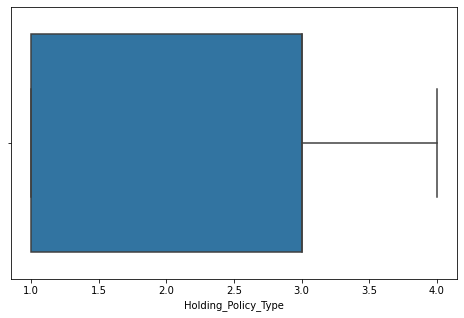

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot('Holding_Policy_Type',data=train)

This boxplot shows no outliers in tha data so we can use mean value for fill tha null values

In [13]:
train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mean(),inplace=True)
test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].mean(),inplace=True)

In [14]:
train['Holding_Policy_Type'].isnull().sum(),test['Holding_Policy_Type'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Holding_Policy_Type

In [15]:
train['Health Indicator'].fillna(train['Health Indicator'].mode()[0],inplace=True)
test['Health Indicator'].fillna(test['Health Indicator'].mode()[0],inplace=True)

In this column we are using mode for filling the null values because this has tha categorical value.

In [16]:
train['Health Indicator'].isnull().sum(),test['Health Indicator'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Health Indicator.

In [17]:
train.drop("Holding_Policy_Duration",axis=1,inplace=True)
test.drop("Holding_Policy_Duration",axis=1,inplace=True)

we drop Holding_Policy_Duration column due to present of outlier and null values

In [18]:
train.isnull().sum() , test.isnull().sum() #check null values

(ID                     0
 City_Code              0
 Region_Code            0
 Accomodation_Type      0
 Reco_Insurance_Type    0
 Upper_Age              0
 Lower_Age              0
 Is_Spouse              0
 Health Indicator       0
 Holding_Policy_Type    0
 Reco_Policy_Cat        0
 Reco_Policy_Premium    0
 Response               0
 dtype: int64,
 ID                     0
 City_Code              0
 Region_Code            0
 Accomodation_Type      0
 Reco_Insurance_Type    0
 Upper_Age              0
 Lower_Age              0
 Is_Spouse              0
 Health Indicator       0
 Holding_Policy_Type    0
 Reco_Policy_Cat        0
 Reco_Policy_Premium    0
 dtype: int64)

# Exploratory Data Analysis

In [19]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [20]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,3.000000,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,2.439228,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.000000,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,3.000000,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,1.000000,16,10404.0,0


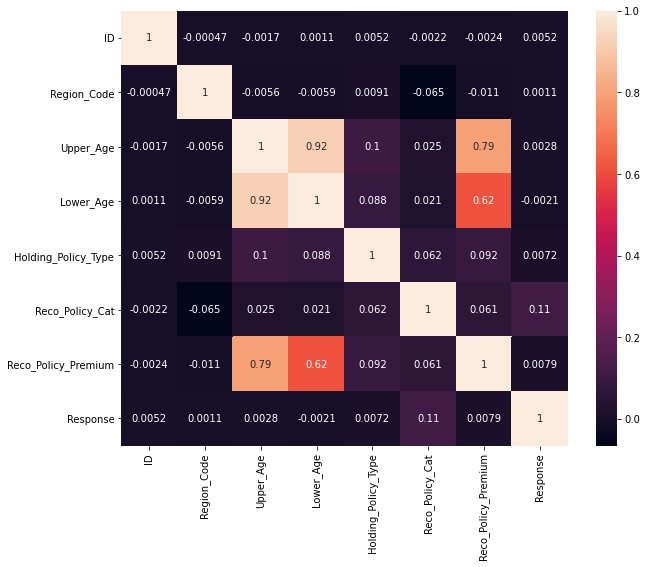

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot = True)
plt.show()

This heat map shows the coorelation between th efeatures of the  training data. Reco_Policy_Premium and Upper age show the highly corelated features.

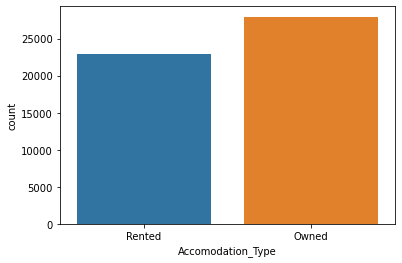

In [22]:
sns.countplot(train['Accomodation_Type'])

The Owned house coustomer more than the Rented house coustomer

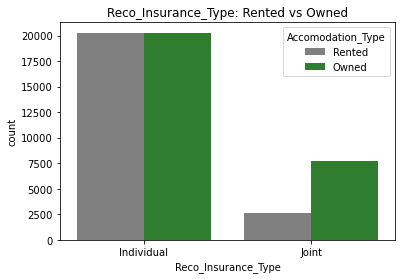

In [23]:
sns.countplot('Reco_Insurance_Type', hue='Accomodation_Type', data=train,palette=["#808080", "#228B22"])
plt.title('Reco_Insurance_Type: Rented vs Owned')
plt.show()

Individual coustomer is more than tha joint coustomer. 

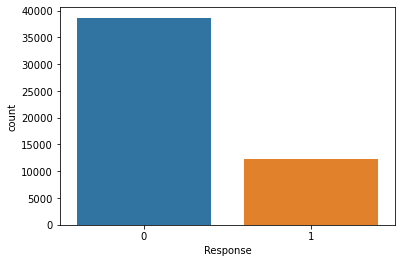

In [24]:
sns.countplot(train['Response'])

Less number of coustomer is Response. 0 showes that coustomer is not respond and 1 showes that coustomer is response

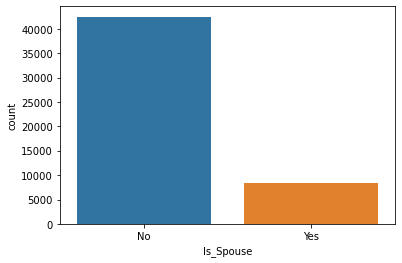

In [25]:
sns.countplot(train['Is_Spouse'])

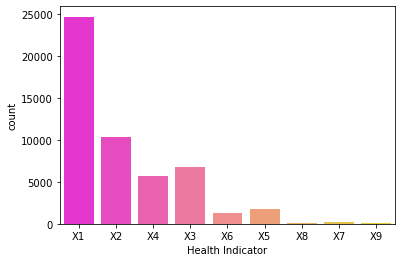

In [26]:
sns.countplot(train['Health Indicator'],palette='spring')

This graph showes tha elements of Health Indicator

# Building Model

In [27]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,3.000000,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,2.439228,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.000000,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,3.000000,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,1.000000,16,10404.0,0


In [28]:
# Labelencoding use for datapreprocessing
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

Encoding the required columns from training and test dataset

In [29]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [35]:
# Seperate Features and Target
X= train.drop(columns = ['Response'], axis=1)
y= train['Response']

In [46]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

# Logistic regression model

In [47]:
# now we apply Logistic Regression
features= X.columns
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_valid)


In [48]:
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:",accuracy_score(y_valid,lr_predict))

Logistic Regression Accuracy: 0.7602436867446202


# DecisionTreeClassifier model

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_clf = clf.predict(X_valid)
from sklearn.metrics import accuracy_score
print("Decision Tree Classifier Accuracy : ",accuracy_score(y_valid, y_clf))

Decision Tree Classifier Accuracy :  0.6670924633978579


# RandomForesrClassifier model

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=7, n_estimators = 500)

rf.fit(X_train,y_train)
predictions = rf.predict(X_valid)

from sklearn.metrics import accuracy_score
print("Randomforestclassification : ",accuracy_score(y_valid, predictions))



Randomforestclassification :  0.7602436867446202


# final Submission

we use decision tree algorithm for prediction.

In [51]:
submission = pd.read_csv('sample_submission_QrCyCoT.csv')
final_predictions = clf.predict(test)
submission['Response'] = final_predictions
submission['Response'] = submission['Response'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)

<IPython.core.display.Javascript object>

In [52]:
result=pd.read_csv('my_submission.csv')

<IPython.core.display.Javascript object>

In [53]:
result

,ID,Response
0,50883,1
1,50884,0
2,50885,1
3,50886,1
4,50887,1
...,...,...
21800,72683,0
21801,72684,0
21802,72685,0
21803,72686,0
